<a href="https://colab.research.google.com/github/Nagano11/Python-para-o-Mercado-Financeiro/blob/main/PMF_week_(2023).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise e Otimização de carteiras de investimentos (PMF week)
#### Créditos: Trading com Dados

**Introdução**

Junto às lives feitas pela equipe da Trading com Dados, executei os códigos em paralelo para a análise e otimização da carteira de investimentos de forma a melhorar meus conhecimentos em Data Science, agora focado no mercado de ações.

In [1]:
!pip install riskfolio-lib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 220.9/220.9 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.7/152.7 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.3/222.3 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 918.2/918.2 kB 38.0 MB/s eta 0:00:00


In [2]:
!pip install cvxpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!pip install pybind11

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
pip show matplotlib

Name: matplotlib
Version: 3.7.1
Summary: Python plotting package
Home-page: https://matplotlib.org
Author: John D. Hunter, Michael Droettboom
Author-email: matplotlib-users@python.org
License: PSF
Location: /usr/local/lib/python3.10/dist-packages
Requires: contourpy, cycler, fonttools, kiwisolver, numpy, packaging, pillow, pyparsing, python-dateutil
Required-by: arviz, datascience, fastai, imgaug, matplotlib-venn, missingno, mizani, mlxtend, music21, plotnine, prophet, pycocotools, Riskfolio-Lib, seaborn, wordcloud, yellowbrick


In [5]:
import pandas as pd
import numpy as np
import yfinance as yf
import riskfolio as rp
import matplotlib.pyplot as plt

In [6]:
inicio = '2018-01-01'
fim = '2020-12-30'

ativos = ['PETR4.SA', 'VALE3.SA', 'BBDC4.SA', 'ITSA4.SA', 'ABEV3.SA', 'WEGE3.SA', 'CYRE3.SA', 'UGPA3.SA', 'TAEE4.SA', 'MRFG3.SA']

pesos = np.array([0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10])

In [7]:
carteira = yf.download(tickers=ativos, start=inicio, end=fim)['Adj Close']

[*********************100%***********************]  10 of 10 completed


In [8]:
carteira.head()

,ABEV3.SA,BBDC4.SA,CYRE3.SA,ITSA4.SA,MRFG3.SA,PETR4.SA,TAEE4.SA,UGPA3.SA,VALE3.SA,WEGE3.SA
Date,,,,,,,,,,
2018-01-02,18.143391,15.289297,9.444440,6.376585,4.828982,6.525667,3.955141,34.739544,28.455341,8.906306
2018-01-03,18.185215,15.359588,9.486982,6.451741,4.776062,6.584812,4.019122,34.396526,28.284832,8.771037
2018-01-04,18.084839,15.611598,9.564977,6.573145,4.776062,6.596639,3.926059,34.798222,28.400778,8.685607
2018-01-05,18.151760,15.700026,9.713875,6.584707,4.815753,6.636070,4.019122,34.870426,28.844112,8.721202
2018-01-08,18.118299,15.695605,9.763509,6.578925,4.729757,6.714930,4.019122,35.114159,29.485241,8.792397


In [9]:
retornos = carteira.pct_change().dropna()
retornos.head()

,ABEV3.SA,BBDC4.SA,CYRE3.SA,ITSA4.SA,MRFG3.SA,PETR4.SA,TAEE4.SA,UGPA3.SA,VALE3.SA,WEGE3.SA
Date,,,,,,,,,,
2018-01-03,0.002305,0.004597,0.004504,0.011786,-0.010959,0.009063,0.016176,-0.009874,-0.005992,-0.015188
2018-01-04,-0.005520,0.016407,0.008221,0.018817,0.000000,0.001796,-0.023155,0.011678,0.004099,-0.009740
2018-01-05,0.003700,0.005664,0.015567,0.001759,0.008310,0.005977,0.023704,0.002075,0.015610,0.004098
2018-01-08,-0.001843,-0.000282,0.005110,-0.000878,-0.017857,0.011884,0.000000,0.006990,0.022227,0.008163
2018-01-09,-0.002770,-0.009296,-0.004357,-0.015817,-0.012587,0.000000,0.018813,-0.003856,-0.003701,0.016195


In [10]:
# Retorno diário da carteira

retorno_carteira = pd.Series((round(retornos*pesos*100, 2)).sum(axis='columns'), name='Portfolio')
retorno_carteira

Date
2018-01-03    0.07
2018-01-04    0.22
2018-01-05    0.88
2018-01-08    0.33
2018-01-09   -0.18
              ... 
2020-12-21   -1.94
2020-12-22    0.97
2020-12-23    0.74
2020-12-28    1.07
2020-12-29    0.37
Name: Portfolio, Length: 740, dtype: float64

<Axes: xlabel='Date'>

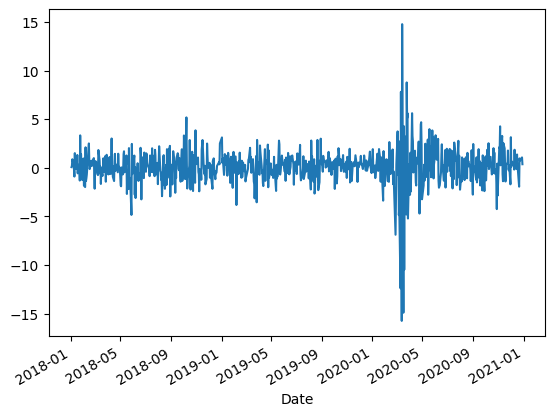

In [11]:
retorno_carteira.plot()

In [12]:
ativos = [carteira.columns]
ativos

[Index(['ABEV3.SA', 'BBDC4.SA', 'CYRE3.SA', 'ITSA4.SA', 'MRFG3.SA', 'PETR4.SA',
        'TAEE4.SA', 'UGPA3.SA', 'VALE3.SA', 'WEGE3.SA'],
       dtype='object')]

In [13]:
# Transformar a minha lista de pesos em um DataFrame

pesos_df = pd.DataFrame(data={'pesos':pesos}, index=ativos)
pesos_df

,pesos
ABEV3.SA,0.1
BBDC4.SA,0.1
CYRE3.SA,0.1
ITSA4.SA,0.1
MRFG3.SA,0.1
PETR4.SA,0.1
TAEE4.SA,0.1
UGPA3.SA,0.1
VALE3.SA,0.1
WEGE3.SA,0.1


<Axes: title={'center': 'Historical Compounded Cumulative Returns'}>

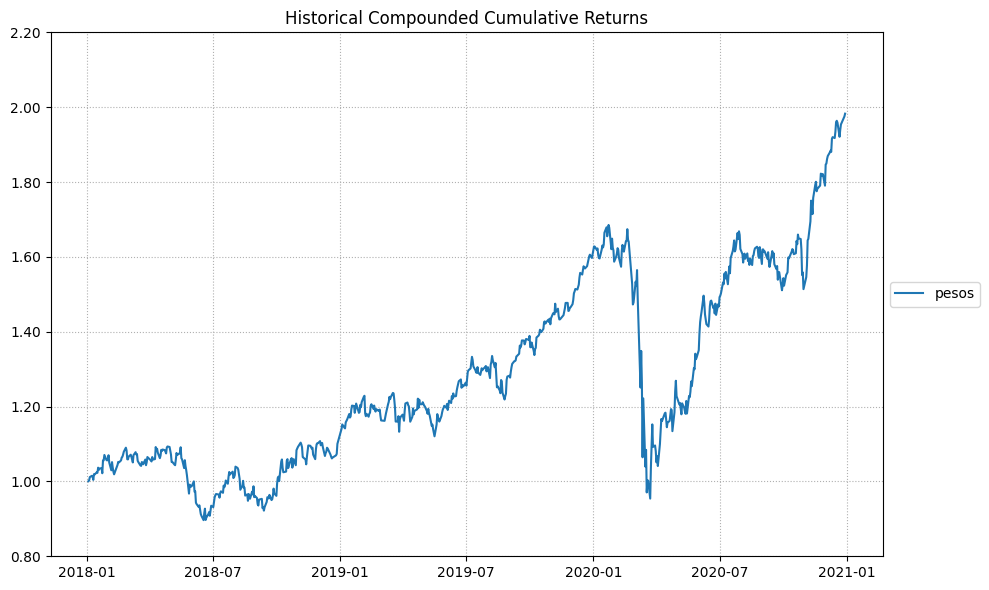

In [14]:
# Plotando o gráfico de Retorno acumulado

rp.plot_series(returns=retornos, w=pesos_df, cmap='tab20', height=6, width=10, ax=None)

In [15]:
# Volatilidade da carteira
# Usado muito no mercado financeiro = Desvio Padrão

# Matriz de Covariância

cov = retornos.cov()
cov

,ABEV3.SA,BBDC4.SA,CYRE3.SA,ITSA4.SA,MRFG3.SA,PETR4.SA,TAEE4.SA,UGPA3.SA,VALE3.SA,WEGE3.SA
ABEV3.SA,0.000442,0.000290,0.000345,0.000240,0.000204,0.000298,0.000097,0.000331,0.000165,0.000220
BBDC4.SA,0.000290,0.000666,0.000587,0.000494,0.000300,0.000562,0.000127,0.000537,0.000318,0.000250
CYRE3.SA,0.000345,0.000587,0.001177,0.000475,0.000439,0.000686,0.000181,0.000715,0.000344,0.000394
ITSA4.SA,0.000240,0.000494,0.000475,0.000474,0.000225,0.000440,0.000127,0.000433,0.000238,0.000224
MRFG3.SA,0.000204,0.000300,0.000439,0.000225,0.001170,0.000532,0.000090,0.000446,0.000391,0.000313
PETR4.SA,0.000298,0.000562,0.000686,0.000440,0.000532,0.001095,0.000153,0.000615,0.000471,0.000353
TAEE4.SA,0.000097,0.000127,0.000181,0.000127,0.000090,0.000153,0.000297,0.000182,0.000064,0.000095
UGPA3.SA,0.000331,0.000537,0.000715,0.000433,0.000446,0.000615,0.000182,0.001083,0.000400,0.000333
VALE3.SA,0.000165,0.000318,0.000344,0.000238,0.000391,0.000471,0.000064,0.000400,0.000754,0.000208
WEGE3.SA,0.000220,0.000250,0.000394,0.000224,0.000313,0.000353,0.000095,0.000333,0.000208,0.000636


In [16]:
# Volatilidade diária

volat_diaria = np.sqrt(np.dot(pesos.T, np.dot(cov, pesos)))
volat_diaria

0.019406434062000644

In [17]:
# Volatilidade anualizada

vol_analizada = volat_diaria * np.sqrt(252)
vol_analizada

0.3080675901757604

30,8% de volatilidade

### Modelo de Otimização

In [18]:
#Construit um objeto Portfolio

port = rp.Portfolio(returns=retornos)

In [25]:
# Método de otimização e os parâmetros

mu_retorno = 'hist'
cov_est = 'hist'

# Definindo parâmetros
port.assets_stats(method_mu=mu_retorno, method_cov=cov_est)

model='Classic'
rm='MV'
obj='Sharpe'
hist=True
rf=0
l=0

In [26]:
carteiras = 200

fronteira = port.efficient_frontier(model=model, rm=rm, points=carteiras, rf=rf, hist=hist)

display(fronteira.T.head())

,ABEV3.SA,BBDC4.SA,CYRE3.SA,ITSA4.SA,MRFG3.SA,PETR4.SA,TAEE4.SA,UGPA3.SA,VALE3.SA,WEGE3.SA
0,0.197974,4.793232e-10,1.631168e-10,0.067022,0.016641,1.945143e-10,0.506410,1.722905e-10,0.118341,0.093611
1,0.141995,1.729146e-08,6.275515e-09,0.056810,0.018331,6.463468e-09,0.520842,4.575303e-09,0.128302,0.133720
2,0.118729,2.837284e-09,1.100712e-09,0.052569,0.019040,1.065803e-09,0.526834,7.017191e-10,0.132438,0.150390
3,0.100822,9.538497e-09,4.082380e-09,0.049301,0.019589,3.667433e-09,0.531448,2.242911e-09,0.135621,0.163220
4,0.085682,1.203128e-08,5.469335e-09,0.046535,0.020053,4.661545e-09,0.535348,2.709381e-09,0.138313,0.174068


In [28]:
pesos_otimos = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

display(pesos_otimos.T)

,ABEV3.SA,BBDC4.SA,CYRE3.SA,ITSA4.SA,MRFG3.SA,PETR4.SA,TAEE4.SA,UGPA3.SA,VALE3.SA,WEGE3.SA
weights,7.594146e-09,1.264748e-08,3.795832e-07,1.628140e-08,0.003012,1.646060e-08,0.454401,4.493660e-09,0.147142,0.395444


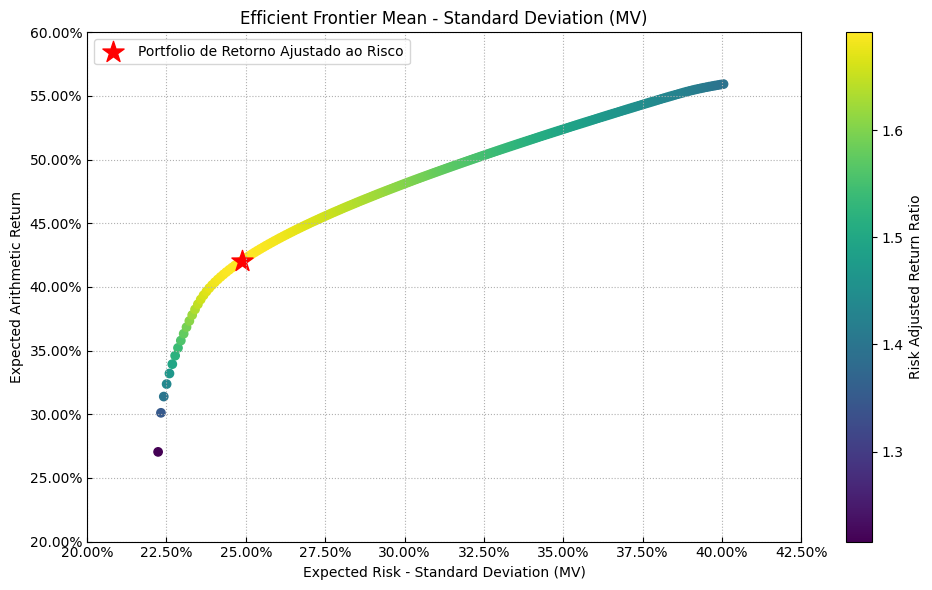

In [30]:
label = 'Portfolio de Retorno Ajustado ao Risco'
mu = port.mu
cov = port.cov
returns = port.returns

ax = rp.plot_frontier(w_frontier=fronteira, mu=mu, cov=cov, returns=returns, rm=rm, 
                      rf=rf, alpha=0.05, cmap='viridis', w=pesos_otimos, label=label, 
                      marker='*', s=16, c='r', height=6, width=10, ax=None)

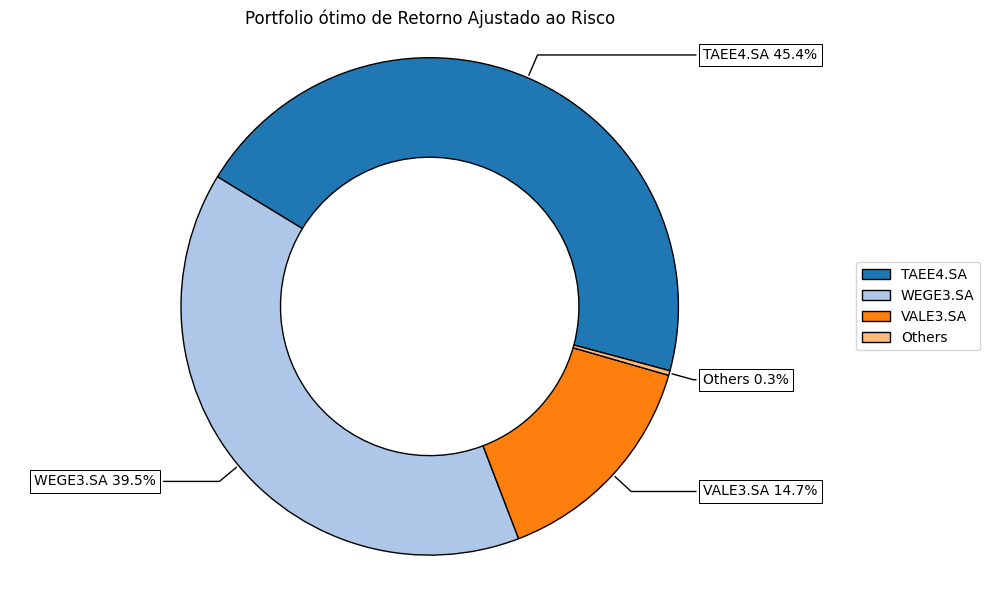

In [31]:
ax = rp.plot_pie(w=pesos_otimos, title='Portfolio ótimo de Retorno Ajustado ao Risco', others=0.05, nrow=25, cmap='tab20', height=6, width=10, ax=None)

###Retornos out of sample

In [34]:
ativos = ['PETR4.SA', 'VALE3.SA', 'BBDC4.SA', 'ITSA4.SA', 'ABEV3.SA', 'WEGE3.SA', 'CYRE3.SA', 'UGPA3.SA', 'TAEE4.SA', 'MRFG3.SA']

In [35]:
carteira_out = yf.download(tickers=ativos, start='2022-01-01', end='2023-04-30')['Adj Close']
retornos_out = carteira_out.pct_change().dropna()
retornos_out

[*********************100%***********************]  10 of 10 completed


,ABEV3.SA,BBDC4.SA,CYRE3.SA,ITSA4.SA,MRFG3.SA,PETR4.SA,TAEE4.SA,UGPA3.SA,VALE3.SA,WEGE3.SA
Date,,,,,,,,,,
2022-01-04,-0.001305,0.006557,-0.017906,0.007760,0.011283,0.003781,0.007438,-0.037535,-0.011795,-0.004997
2022-01-05,-0.019595,-0.007071,-0.025947,-0.011001,-0.007903,-0.038699,-0.004102,-0.026490,0.009471,-0.052731
2022-01-06,-0.015989,0.014242,-0.008639,0.008899,0.000000,-0.000713,-0.001647,-0.014361,0.020177,-0.000331
2022-01-07,-0.016249,0.014543,0.013798,0.012128,-0.007966,0.004635,-0.001650,-0.006902,0.058201,-0.025191
2022-01-10,0.008259,0.003460,-0.020057,0.000000,0.013698,-0.006033,-0.000826,-0.013127,-0.011905,-0.028902
...,...,...,...,...,...,...,...,...,...,...
2023-04-24,-0.017808,-0.008142,0.005341,0.004689,-0.003150,0.019108,0.019015,0.016017,-0.036164,0.002484
2023-04-25,-0.003487,0.022388,-0.011952,0.002334,0.000000,-0.004044,0.002544,-0.008225,-0.027237,0.004709
2023-04-26,-0.005598,-0.014599,-0.006720,-0.012806,-0.023697,-0.012551,-0.010998,-0.021424,0.003857,-0.010607


<Axes: title={'center': 'Historical Compounded Cumulative Returns'}>

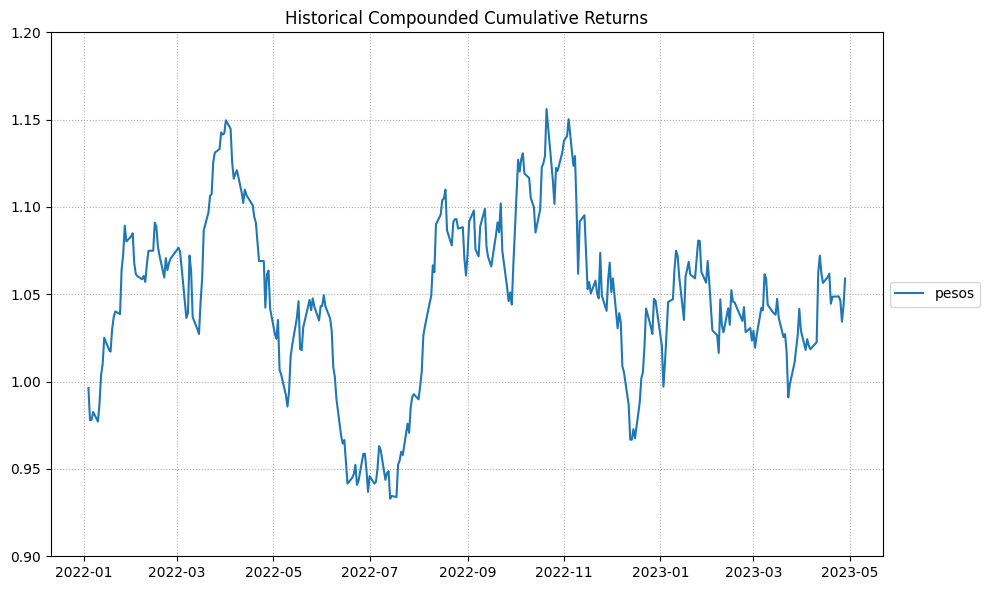

In [39]:
# Retorno acumulado da alocação 10% em cada ativo

rp.plot_series(returns=retornos_out, w=pesos_df, cmap='tab20', height=6, width=10, ax=None)

<Axes: title={'center': 'Historical Compounded Cumulative Returns'}>

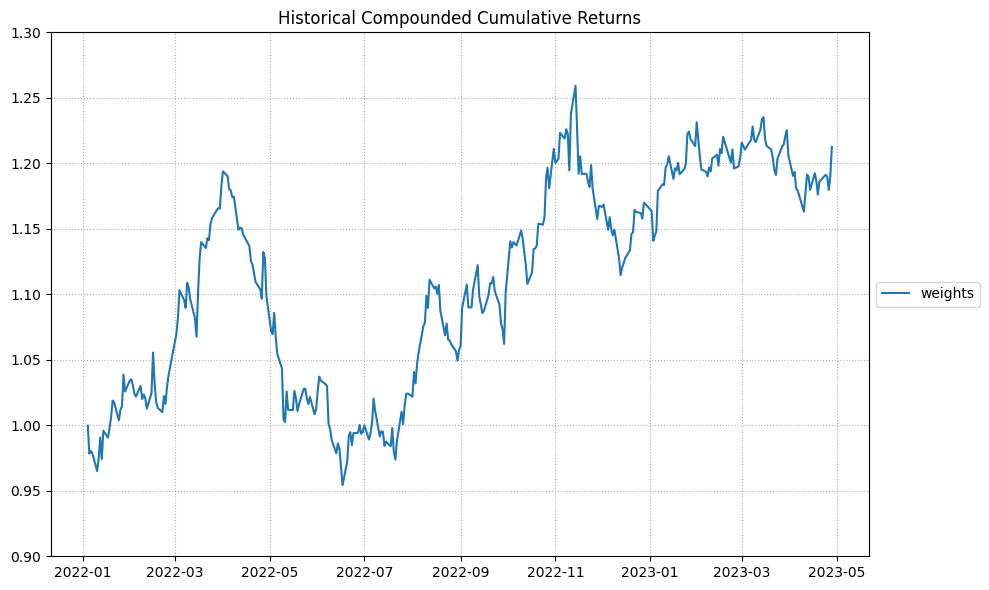

In [40]:
# Retorno acumulado da alocação ótima em cada ativo

rp.plot_series(returns=retornos_out, w=pesos_otimos, cmap='tab20', height=6, width=10, ax=None)

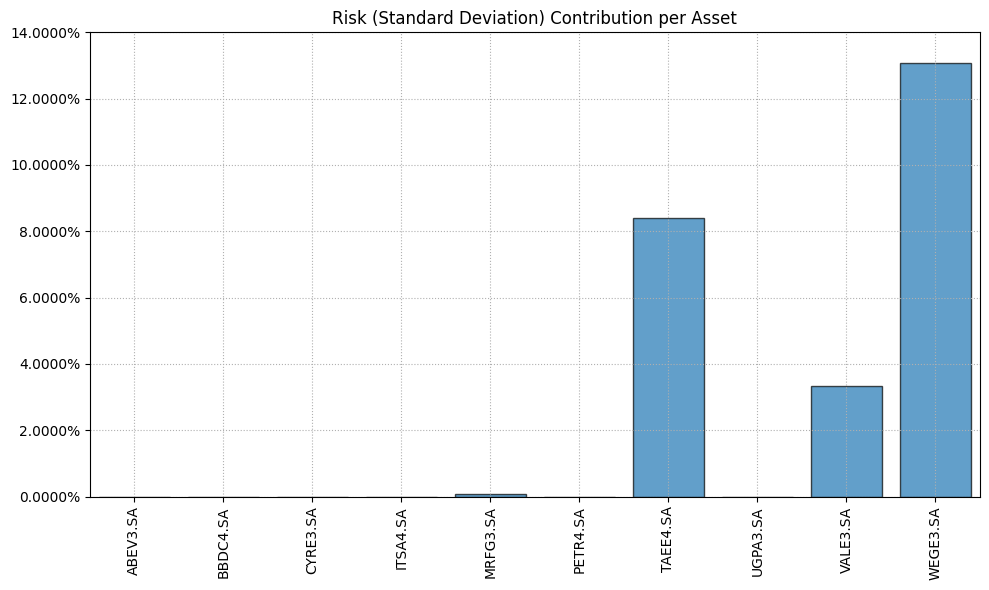

In [41]:
#Plotando a contribuição marginal de risco de cada ativo

mu = retornos.mean()
cov = retornos.cov()
returns = retornos

ax = rp.plot_risk_con(w=pesos_otimos, cov=cov, returns=returns, rm=rm, rf=0, alpha=0.05, color='tab:blue', height=6, width=10, t_factor=252, ax=None)
